In [67]:
import pandas as pd 
df = pd.read_csv('latest.csv') 
df.head(10)

,ip,timestamp,method,url,status,size,label
0,137.213.252.206,2025-07-08T09:36:43,POST,http://93.44.182.77:8692/,403,2299,Normal
1,126.65.37.188,2025-07-07T12:21:39,POST,http://28.224.16.164:8772/contact,302,2397,Normal
2,204.168.198.11,2025-07-04T22:41:16,GET,http://192.219.122.185:8426/index.html,404,2725,Normal
3,202.102.174.217,2025-07-09T23:07:27,POST,http://6.132.230.225:8864/item?id=FUZZ,403,3958,Fuzzing
4,164.127.116.165,2025-07-04T03:28:32,POST,http://218.128.204.123:8462/services,403,5947,Normal
5,146.200.171.60,2025-07-09T23:03:07,POST,http://179.0.186.251:8955/contact,500,1002,Normal
6,110.247.94.218,2025-07-03T11:36:03,POST,http://35.57.47.177:8957/services,403,4526,Normal
7,170.207.211.32,2025-07-09T11:14:38,GET,http://188.38.161.181:8046/login.php?user=admi...,302,764,BruteForce
8,40.183.41.54,2025-07-07T00:41:01,POST,http://213.212.158.128:8402/page?param=<svg/on...,302,3596,XSS
9,210.165.159.198,2025-07-02T17:05:23,POST,http://87.188.229.111:8600/products,200,1196,Normal


In [68]:
# breaking timestamp into hours,minutes and seconds
df['timestamp_parsed'] = pd.to_datetime(
    df['timestamp'],
    format='%Y-%m-%dT%H:%M:%S',
    errors='coerce'
)
df['hour'] = df['timestamp_parsed'].dt.hour 
df['minute'] = df['timestamp_parsed'].dt.minute 
df['second'] = df['timestamp_parsed'].dt.second 
df['day_of_week'] = df['timestamp_parsed'].dt.dayofweek           
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['is_night'] = df['hour'].apply(lambda h: 1 if h < 6 or h >= 22 else 0)
df['is_attack'] = df['label'].apply(lambda x: 0 if x=='Normal' else 1)
df.drop(['timestamp','timestamp_parsed'],axis=1,inplace=True)
df.head(10)

,ip,method,url,status,size,label,hour,minute,second,day_of_week,is_weekend,is_night,is_attack
0,137.213.252.206,POST,http://93.44.182.77:8692/,403,2299,Normal,9,36,43,1,0,0,0
1,126.65.37.188,POST,http://28.224.16.164:8772/contact,302,2397,Normal,12,21,39,0,0,0,0
2,204.168.198.11,GET,http://192.219.122.185:8426/index.html,404,2725,Normal,22,41,16,4,0,1,0
3,202.102.174.217,POST,http://6.132.230.225:8864/item?id=FUZZ,403,3958,Fuzzing,23,7,27,2,0,1,1
4,164.127.116.165,POST,http://218.128.204.123:8462/services,403,5947,Normal,3,28,32,4,0,1,0
5,146.200.171.60,POST,http://179.0.186.251:8955/contact,500,1002,Normal,23,3,7,2,0,1,0
6,110.247.94.218,POST,http://35.57.47.177:8957/services,403,4526,Normal,11,36,3,3,0,0,0
7,170.207.211.32,GET,http://188.38.161.181:8046/login.php?user=admi...,302,764,BruteForce,11,14,38,2,0,0,1
8,40.183.41.54,POST,http://213.212.158.128:8402/page?param=<svg/on...,302,3596,XSS,0,41,1,0,0,1,1
9,210.165.159.198,POST,http://87.188.229.111:8600/products,200,1196,Normal,17,5,23,2,0,0,0


In [69]:
# encoding categorical feature columns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
df['method'] = le.fit_transform(df['method']) 
df['method'].tail()

999995    1
999996    1
999997    1
999998    1
999999    0
Name: method, dtype: int64

In [70]:
# Normalizing numeric columns 
numeric_cols = ['status','size'] 
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) 
df.head()

,ip,method,url,status,size,label,hour,minute,second,day_of_week,is_weekend,is_night,is_attack
0,137.213.252.206,1,http://93.44.182.77:8692/,0.676667,0.350702,Normal,9,36,43,1,0,0,0
1,126.65.37.188,1,http://28.224.16.164:8772/contact,0.340000,0.367895,Normal,12,21,39,0,0,0,0
2,204.168.198.11,0,http://192.219.122.185:8426/index.html,0.680000,0.425439,Normal,22,41,16,4,0,1,0
3,202.102.174.217,1,http://6.132.230.225:8864/item?id=FUZZ,0.676667,0.641754,Fuzzing,23,7,27,2,0,1,1
4,164.127.116.165,1,http://218.128.204.123:8462/services,0.676667,0.990702,Normal,3,28,32,4,0,1,0


<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

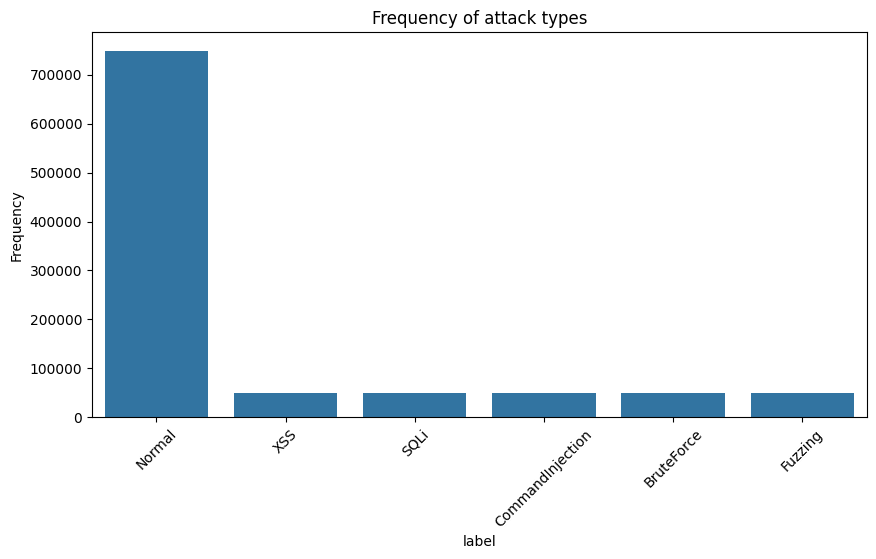

In [71]:
# Distribution of attack types 
import seaborn as sb 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5)) 
sb.countplot(x='label',data=df,order=df['label'].value_counts().index)
plt.title('Frequency of attack types') 
plt.xticks(rotation=45) 
plt.ylabel('Frequency')
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

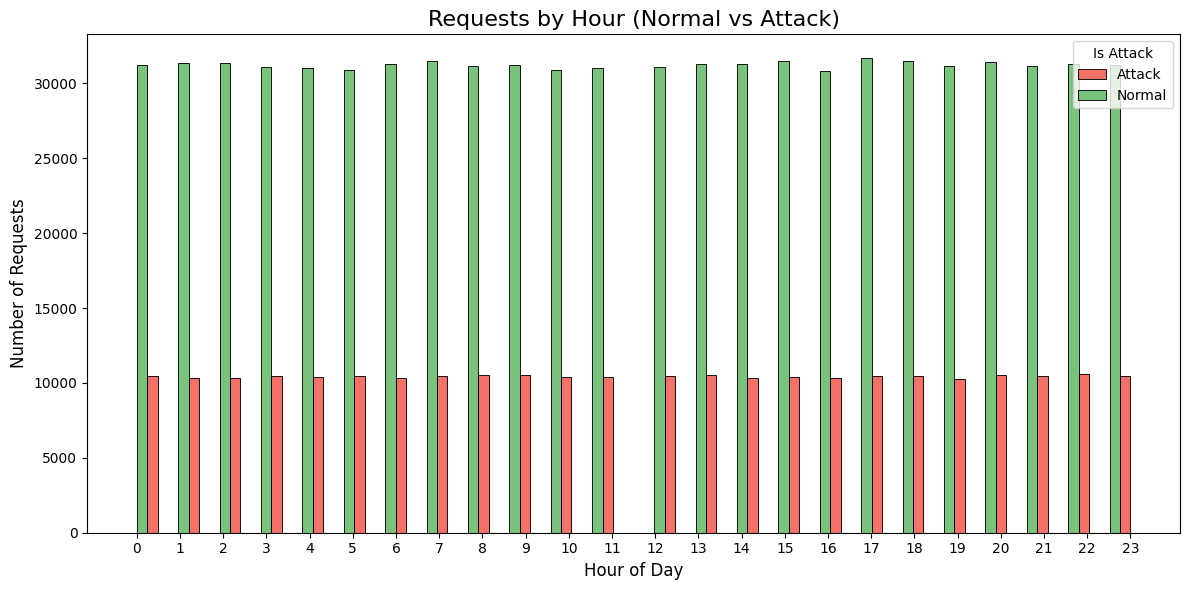

In [72]:
# attacks by hour
plt.figure(figsize=(12,6))
sb.histplot(
    data=df,
    x='hour',
    hue='is_attack',
    multiple='dodge',  # side-by-side bars
    palette={0: "#4CAF50", 1: "#F44336"},  # green for normal, red for attack
    bins=48
)
plt.title('Requests by Hour (Normal vs Attack)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.legend(title='Is Attack', labels=['Attack','Normal'])
plt.xticks(range(0, 24))
plt.tight_layout()
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

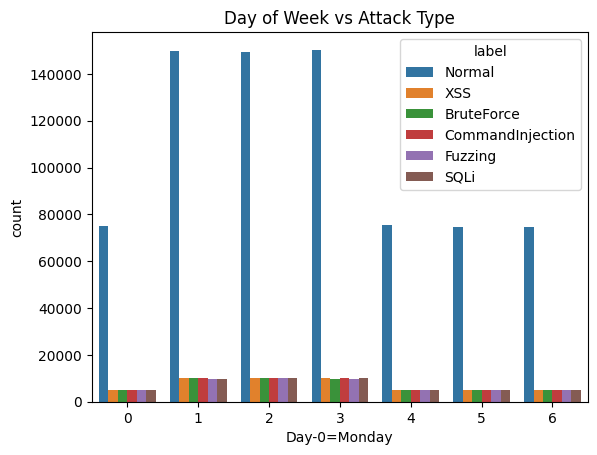

In [73]:
# attacks by day of week
sb.countplot(x='day_of_week', data=df, hue='label')
plt.title("Day of Week vs Attack Type")
plt.xlabel("Day-0=Monday")
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

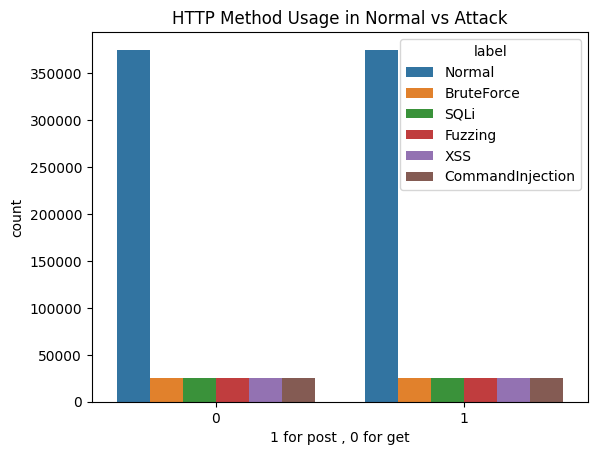

In [74]:
# method vs attack 
sb.countplot(x='method', hue='label', data=df)
plt.title("HTTP Method Usage in Normal vs Attack")
plt.xlabel('1 for post , 0 for get')
plt

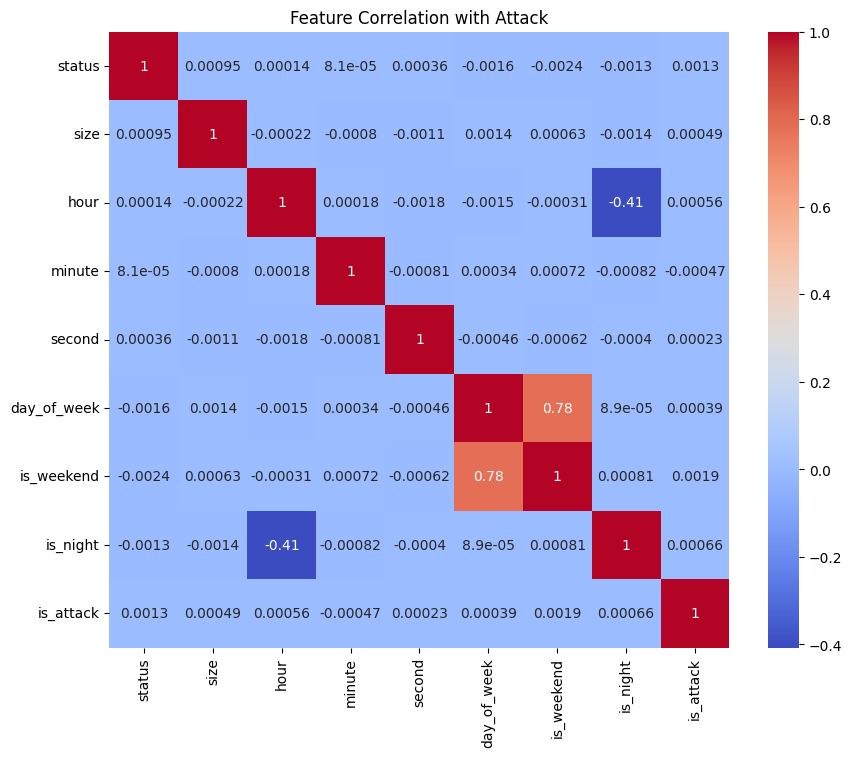

In [75]:
# Correlation heatmap of numerical features 
numerical_cols = ['status', 'size', 'hour', 'minute', 'second', 'day_of_week', 'is_weekend', 'is_night']
corr = df[numerical_cols + ['is_attack']].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Attack")
plt.show()

# Binary classification to detect a attack 

In [76]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score


tfidf = TfidfVectorizer(max_features=100)
url_tfidf = tfidf.fit_transform(df['url']).toarray() 


main_features = ['status', 'size', 'hour', 'minute', 'second',
                 'day_of_week', 'is_weekend', 'is_night', 'method']
X_main = df[main_features].values  


X_combined = np.hstack([X_main, url_tfidf])


y = df['is_attack']


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

attack_detector = LogisticRegression(max_iter=1000)
attack_detector.fit(X_train, y_train)

# Evaluation
print("Accuracy:", attack_detector.score(X_test, y_test))
y_pred = attack_detector.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred))


Accuracy: 1.0
accuracy_score: 1.0
precision_score: 1.0


In [77]:
def prepare_features_attack(data_dict, tfidf, scaler):
    import pandas as pd
    import numpy as np

    df = pd.DataFrame([data_dict])

    df['timestamp_parsed'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
    df['hour'] = df['timestamp_parsed'].dt.hour
    df['minute'] = df['timestamp_parsed'].dt.minute
    df['second'] = df['timestamp_parsed'].dt.second
    df['day_of_week'] = df['timestamp_parsed'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    df['is_night'] = df['hour'].apply(lambda h: 1 if h < 6 or h >= 22 else 0)
    df['method'] = df['method'].apply(lambda m:1 if m=='POST' else 0)

    numeric_cols = ['status', 'size', 'hour', 'minute', 'second',
                    'day_of_week', 'is_weekend', 'is_night', 'method']
    X_numeric = df[numeric_cols].fillna(0)

    X_scaled = scaler.transform(X_numeric[['status', 'size']].values)

    other_features = X_numeric.drop(['status', 'size'], axis=1).values

    url_vec = tfidf.transform(df['url'].fillna('')).toarray()

    X_final = np.hstack([X_scaled, other_features, url_vec])

    return X_final

In [78]:
# prediction
sample_input = {
    "timestamp": "2025-07-30T10:28:55", 
    "method": "POST",
    "url": "profile?bio=<img src=x onerror=alert('XSS')>,404,3805",
    "status": 400,
    "size": 8632
}

X_input = prepare_features_attack(sample_input, tfidf=tfidf, scaler=scaler)

if X_input.shape[1] == attack_detector.n_features_in_:
    y_pred = 'Normal' if attack_detector.predict(X_input)[0] == 0 else 'Attack'
    print("Prediction:", y_pred)
else:
    print("Feature mismatch: input shape doesn't match model expectations.")


Prediction: Attack


c:\Users\Sakriya Pyakurel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Multilabel classification for attack type

In [79]:
df_filtered = df[df['is_attack']!=0]
tfidf = TfidfVectorizer(max_features=100)
url_tfidf = tfidf.fit_transform(df_filtered['url']).toarray() 


main_features = ['status', 'size', 'hour', 'minute', 'second',
                 'day_of_week', 'is_weekend', 'is_night', 'method']
X_main = df_filtered[main_features].values  

y = df_filtered['label']

X_combined = np.hstack([X_main, url_tfidf])
from sklearn.ensemble import RandomForestClassifier 
X_train,X_test,y_train,y_test = train_test_split(X_combined,y,test_size=0.2,random_state=42)
attack_classifier = RandomForestClassifier() 
attack_classifier.fit(X_train,y_train) 
y_pred = attack_classifier.predict(X_test) 
y_pred[:5]

array(['Fuzzing', 'SQLi', 'SQLi', 'SQLi', 'XSS'], dtype=object)

In [80]:
# accuracy calculation 
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
print('Accuracy: ',accuracy)
print('Precision: ',precision)

Accuracy:  1.0
Precision:  1.0


In [81]:
y_pred = attack_classifier.predict(X_input)[0] 
print('Predicted attack: ',y_pred)

Predicted attack:  XSS


In [82]:
# saving the model objects into .pkl file 
import joblib 
data = {
    'attack_detector': attack_detector,
    'attack_classifer':attack_classifier,
    'scaler':scaler,
    'vectorizer':tfidf,
}
joblib.dump(data,'objects.pkl')

['objects.pkl']